Name: Ayse Irmak Ercevik

Topic: Implementation of a k-means clustering for classification and Comperision of Model Results with The Decision Tree Classifier.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

from itertools import cycle

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from dt import DecisionTreeClassifier
from kmeans import KMeansClusterClassifier

# Exploratory Data Analysis (EDA)

### Read Dataset

In [3]:
iris = pd.read_csv("Iris.csv");

Improve dataset:
Remove id column 
Change Class labels that are given in the last column to  integer values (0, 1, 2);


In [4]:
iris = iris.drop(columns="Id");
spc = {'Iris-setosa': 0,'Iris-versicolor': 1,'Iris-virginica': 2} 
iris["Species"] = [spc[item] for item in iris["Species"]];


### Dataset Summary

General image of dataset

In [5]:
display(iris);

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Duplicat data in the dataset

In [6]:
display(iris[iris.duplicated()])
display(iris.duplicated().sum())

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,0
37,4.9,3.1,1.5,0.1,0
142,5.8,2.7,5.1,1.9,2


3

Checking balance of dataset

C:\Users\begon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


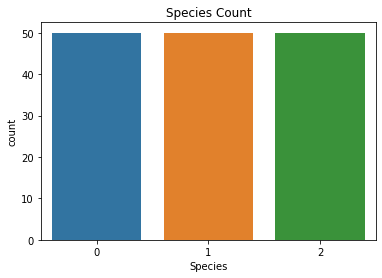

In [7]:
plt.title("Species Count")
sns.countplot(iris["Species"]);

As seen above,dataset is balanced,removing duplicates break the balance of our dataset. 
Checking, if any null value exists in the data set

In [8]:
display(iris.isnull().sum(axis=0))

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Pair-plots for features

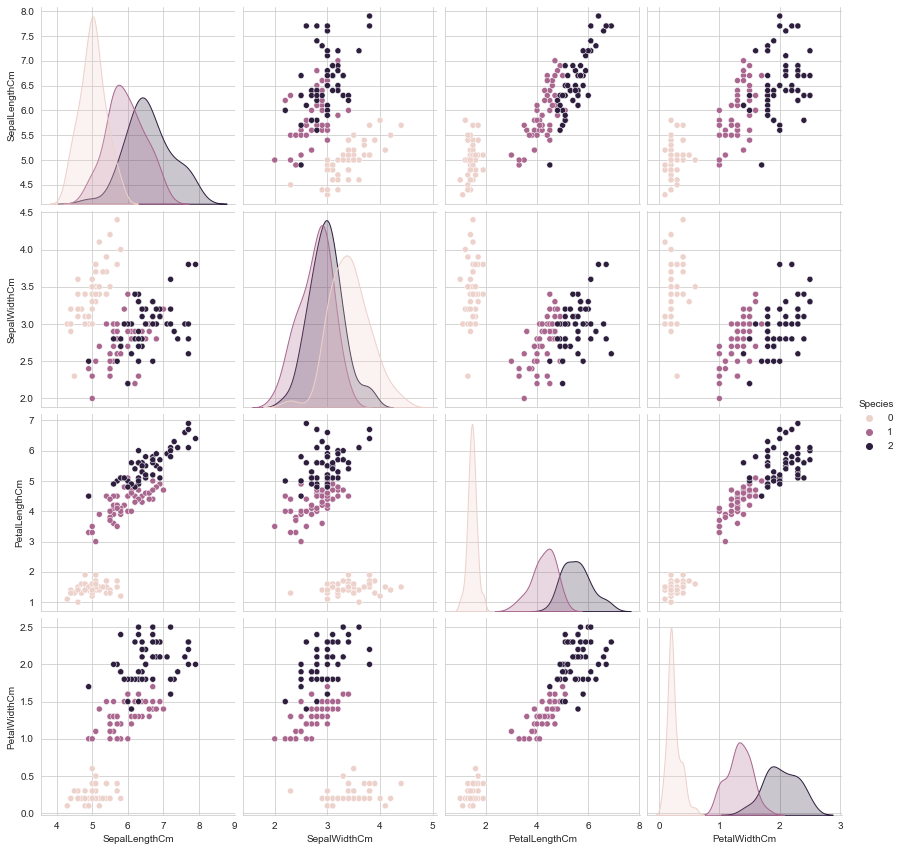

In [9]:
sns.set_style("whitegrid");
sns.pairplot(iris,hue="Species",height=3);
plt.show();

When compare species according to their features, 
Setosa appears to have more characteristic features compared to other species and
it cen be observed that the characteristics of Versicolor and Virginia are closer.

### Correlation Matrix of Features - Correlation Matrix of Features and Target

Feature columns: SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Target columns: Species

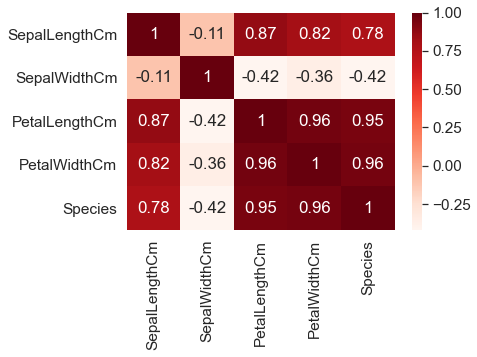

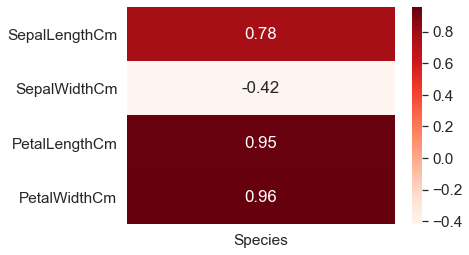

In [10]:
cm =iris.corr()
ft=cm.drop(columns=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]);    
ft=ft.drop(labels=["Species"]);

sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap=plt.cm.Reds)
plt.show()

sns.set(font_scale=1.4)
sns.heatmap(ft, annot=True, cmap=plt.cm.Reds)
plt.show()

As seen above,when we absorve the corrolation between features;
Petal_length and petal_width have a high correlation, petal_width and sepal_length have good correlation as well as petal_length and sepal_length have good correlations.

when we absorve the corrolation of species and feature; it can be expected that;
Virginica sepal_width can be smaller than sepal_width of versicolar and setosa also
petal_length and petal_width of virginaca can be heighest.

# Train Decision Tree classifier

In [11]:
clf = DecisionTreeClassifier(max_depth=5)

Split dataset to train and test

In [12]:
X=iris.values.tolist();
y=[];
for row in X:
    y.append(int(row[4]));
    del row[4];
X=pd.Series(X);
y=pd.Series(y);
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True);

X_train_list=X_train.values.tolist();
y_train_list=y_train.values.tolist();
X_test_list=X_test.values.tolist();
y_test_list=y_test.values.tolist();

## Train The Decision Tree Classifier

In [13]:
clf.fit(X_train_list,y_train_list);

## Predict Class of Test values

In [14]:
yhat = clf.predict(X_test_list)
print("Test Features Expected Classification")
print(y_test_list)
print("Prediction")
print(yhat);


Test Features Expected Classification
[1, 0, 1, 2, 0, 2, 2, 1, 0, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 2, 2, 2]
Prediction
[1, 0, 1, 2, 0, 2, 2, 1, 0, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 0, 2, 0, 0, 1, 0, 1, 0, 2, 2, 2]


# Train K Means Cluster Classifier

Creat elbow method to dertermine ideal number of clusters

## Elbow Method

range(1, 10)


C:\Users\begon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2.084383226974944, 1.1812610091141367, 0.923913975379275, 0.8475877779015704, 0.7415435010217719, 0.6666977041831951, 0.629898268752666, 0.5892366460767933, 0.5561421306184042]
range(1, 10)
0.5561421306184042


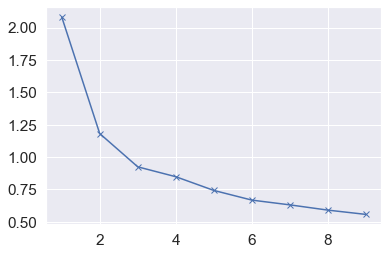

In [15]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import math
distortions = []
K = range(1,10)
print(K)
X  = scale(iris);
for k in K: 
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(X)
    distortions.append(sum(np.min(cdist(X,kmeans_model.cluster_centers_,"euclidean"),axis=1))/X.shape[0])
print(distortions)
print(K)
print(np.min(distortions))
plt.plot(K,distortions,'bx-')

The plot shows that the ideal number of cluster should be between 2 and 4.
In that case we assume it 3

## Train The K Means Cluster Classifier

In [16]:
clf2=KMeansClusterClassifier(n_cluster=3)
clf2.fit(X_train_list,y_train_list);

## Plot of 3D Cluster


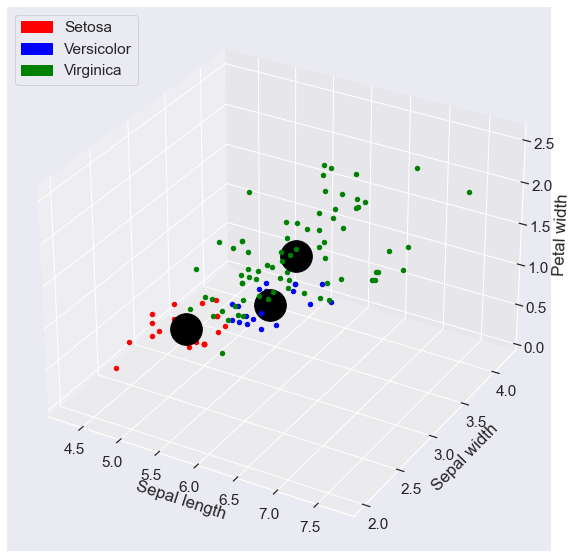

In [17]:
import matplotlib.patches as mpatches
colors=['red', 'blue', 'green']
target_names = ['setosa', 'versicolor', 'virginica']
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')

for i in range(len(clf2.data_list)):
    ax.scatter(clf2.data_list[i][0], clf2.data_list[i][1], clf2.data_list[i][2], color = colors[clf2.labelL[i]],s=20, marker='o')
    
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal width')   

for i in range(3):
    ax.scatter3D(clf2.centerL[i][0], clf2.centerL[i][1], clf2.centerL[i][2],marker='o',s=1000, c = 'black')
red_patch = mpatches.Patch(color='red', label='Setosa')
blue_patch = mpatches.Patch(color='blue', label='Versicolor')
green_patch = mpatches.Patch(color='green', label='Virginica')
plt.legend(handles=[red_patch, blue_patch,green_patch], loc = 'upper left')

plt.show()

## Predict Class of Test values

In [18]:
yhat_km = clf2.predict(X_test_list)
print("Test Features Expected Classification")
print(y_test_list)
print("Prediction")
print(yhat_km);

Test Features Expected Classification
[1, 0, 1, 2, 0, 2, 2, 1, 0, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 2, 2, 2]
Prediction
[2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 2, 1, 2, 2, 2]


when we compare the ecpected and predicted values of Kmeans Cluster algo, we may see that the model is succesful in differenciating class 2(virginica) and 0(setosa) but it is not good at differenciating class 1(versicolor).
It can be caused of selecting features. In the model I choose the features of
Sepal length
Sepal width
Petal width which can be distinguishing futures for virginica and setosa.

# Results

### Confusion Matrix of Decision TreeTest

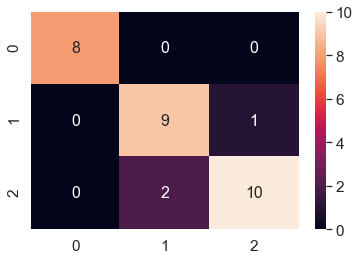

In [19]:
y_pred2 = pd.Series(yhat);
y_test2 = pd.Series(y_test_list);
mt=metrics.confusion_matrix(y_test2, y_pred2)
df_cm = pd.DataFrame(mt, range(3), range(3))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) 
plt.show()

### Confusion Matrix of K Means Cluster Test

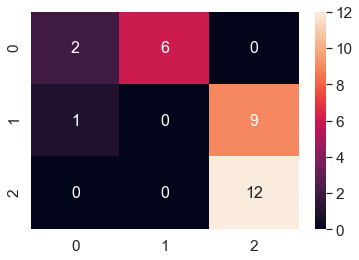

In [20]:
y_pred_km = pd.Series(yhat_km);
mt=metrics.confusion_matrix(y_test2, y_pred_km)
df_cm = pd.DataFrame(mt, range(3), range(3))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) 
plt.show()

When we compare the confusion matrixs of Decision tree and K Means Cluster models we can see that the performance of Decision Tree Classifier is better than the performance of K Means Cluster.

### F1-Score of Decision Tree Classifier and K Means Cluster Classifier

In [21]:
f1=metrics.f1_score(y_test2, y_pred2,average='weighted');
print("F1-Score of Decision Tree:")
print(f1);

f2=metrics.f1_score(y_test2, y_pred_km,average='weighted');
print("F1-Score of K Means Cluster:")
print(f2);

F1-Score of Decision Tree:
0.9002070393374741
F1-Score of K Means Cluster:
0.3878787878787879


### Accuracy of Decision Tree Classifier and K Means Cluster Classifier

In [22]:
accuracy= metrics.accuracy_score(y_test2, y_pred2);
print("Accuracy of Decision Tree")
print(accuracy);
accuracy2= metrics.accuracy_score(y_test2, y_pred_km);
print("Accuracy of K Means Cluster")
print(accuracy2);

Accuracy of Decision Tree
0.9
Accuracy of K Means Cluster
0.4666666666666667


### Precision of Decision Tree Classifier and K Means Cluster Classifier

In [23]:
precision=metrics.precision_score(y_test2, y_pred2, average='weighted');
print("Precision of Decision Tree:")
print(precision);
precision2=metrics.precision_score(y_test2, y_pred_km, average='weighted');
print("Precision of K Means Cluster:")
print(precision2);

Precision of Decision Tree:
0.9030303030303028
Precision of K Means Cluster:
0.40634920634920635


### Recal of Decision Tree Classifier and K Means Cluster Classifier

In [24]:
recall=metrics.recall_score(y_test2, y_pred2,average='weighted');
print("Recall Test of Decision Tree:")
print(recall);
recall2=metrics.recall_score(y_test2, y_pred_km,average='weighted');
print("Recall Train: of K Means Cluster")
print(recall2);

Recall Test of Decision Tree:
0.9
Recall Train: of K Means Cluster
0.4666666666666667


On the above that can be seen that, recal,precion and accurcy value of K means model is approximatly 0.5.However, its F1 score is very low.
Also that can be seen that al these 4 values of decision tree heigher than K means model

### Plot of ROC Curve (Decision Tree/K Means Cluster) and Value of AUC (Decision Tree/K Means Cluster)

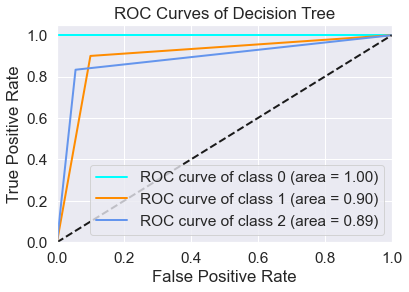

Auc Values of each classes ROC curve are written on graph
Macro Auc value:
0.9296296296296296


In [25]:
y_testb= label_binarize(y_test2, classes=[0, 1, 2]);
y_predb= label_binarize(y_pred2, classes=[0, 1, 2]);

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_testb[:,i], y_predb[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]));
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i]);
mean_tpr /= 3;
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"]);

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of Decision Tree')
plt.legend(loc="lower right")
plt.show()
print("Auc Values of each classes ROC curve are written on graph")
print("Macro Auc value:")
print(roc_auc["macro"]);
      

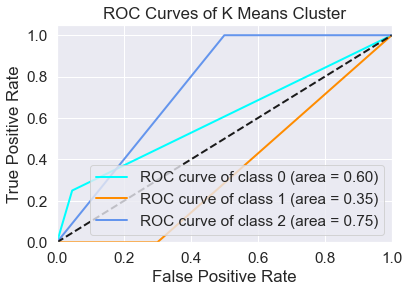

Auc Values of each classes ROC curve are written on graph
Macro Auc value:
0.5674242424242424


In [26]:
x_testb= label_binarize(y_test2, classes=[0, 1, 2]);
x_predb= label_binarize(y_pred_km, classes=[0, 1, 2]);

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(x_testb[:,i], x_predb[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]));
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i]);
mean_tpr /= 3;
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"]);

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of K Means Cluster')
plt.legend(loc="lower right")
plt.show()
print("Auc Values of each classes ROC curve are written on graph")
print("Macro Auc value:")
print(roc_auc["macro"]);

According to the results obtained from the test dataset, minimal deviations were observed while classifying the test data with decision tree model.
However, the performance of K Means Clusteringthis model is not as high as the Decision Tree models. 
This means that the selected features were not distinctive enough to cluster the classes of this data set.